Employee Work Hours Analysis with Anomaly Detection and Visualization

In [1]:
import numpy as np
import pandas as pd

Create 30 employee IDs

In [13]:
employee_ids = [f"EMP{i+1}" for i in range(30)]


Simulate working hours for 7 days

In [14]:
dates = pd.date_range(start="2025-07-07", periods=7)
data

[['EMP001', 'Mon', 9.7],
 ['EMP001', 'Tue', 7.59],
 ['EMP001', 'Wed', 4.94],
 ['EMP001', 'Thu', 9.2],
 ['EMP001', 'Fri', 8.25],
 ['EMP001', 'Sat', np.int64(12)],
 ['EMP001', 'Sun', 9.63],
 ['EMP002', 'Mon', np.int64(12)],
 ['EMP002', 'Tue', 5.83],
 ['EMP002', 'Wed', 6.59],
 ['EMP002', 'Thu', 7.67],
 ['EMP002', 'Fri', 5.75],
 ['EMP002', 'Sat', 6.74],
 ['EMP002', 'Sun', 5.2],
 ['EMP003', 'Mon', 7.55],
 ['EMP003', 'Tue', np.int64(2)],
 ['EMP003', 'Wed', 6.7],
 ['EMP003', 'Thu', np.int64(2)],
 ['EMP003', 'Fri', 8.85],
 ['EMP003', 'Sat', 4.59],
 ['EMP003', 'Sun', 6.64],
 ['EMP004', 'Mon', 6.97],
 ['EMP004', 'Tue', np.int64(12)],
 ['EMP004', 'Wed', 5.09],
 ['EMP004', 'Thu', 6.55],
 ['EMP004', 'Fri', 7.41],
 ['EMP004', 'Sat', np.int64(12)],
 ['EMP004', 'Sun', 9.64],
 ['EMP005', 'Mon', 7.59],
 ['EMP005', 'Tue', 4.53],
 ['EMP005', 'Wed', 4.27],
 ['EMP005', 'Thu', 6.33],
 ['EMP005', 'Fri', 8.97],
 ['EMP005', 'Sat', 5.69],
 ['EMP005', 'Sun', 4.85],
 ['EMP006', 'Mon', 4.45],
 ['EMP006', 'Tue', 8.6

In [15]:
for emp in employee_ids:
    for date in dates:
        hours = round(np.random.uniform(4, 10), 2)
        data.append([emp, date, hours])

df = pd.DataFrame(data, columns=["EmployeeID", "Date", "WorkingHours"])


Create DataFrame

In [16]:
df = pd.DataFrame(data, columns=['EmployeeID', 'Day', 'WorkingHours'])


 Basic Exploration

In [17]:
print("📊 Data Preview:")
print(df.head())

print("\n📋 Data Info:")
print(df.info())

print("\n📈 Summary Statistics:")
print(df.describe())


📊 Data Preview:
  EmployeeID  Day  WorkingHours
0     EMP001  Mon          9.70
1     EMP001  Tue          7.59
2     EMP001  Wed          4.94
3     EMP001  Thu          9.20
4     EMP001  Fri          8.25

📋 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EmployeeID    420 non-null    object 
 1   Day           420 non-null    object 
 2   WorkingHours  420 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.0+ KB
None

📈 Summary Statistics:
       WorkingHours
count    420.000000
mean       7.133548
std        1.950836
min        2.000000
25%        5.590000
50%        7.100000
75%        8.710000
max       12.000000


Grouping and Aggregation

Total weekly hours per employee

In [18]:
total_weekly_hours = df.groupby("EmployeeID")["WorkingHours"].sum().reset_index()
total_weekly_hours.columns = ["EmployeeID", "TotalWeeklyHours"]


Visualizations

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

 a. Total Weekly Hours per Employee

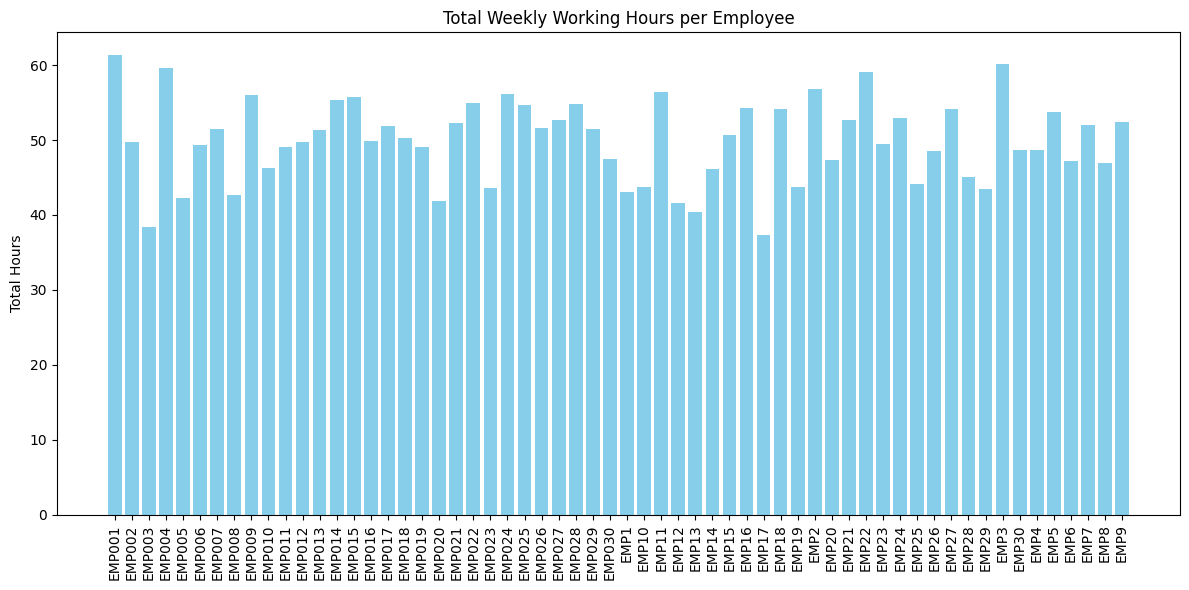

In [24]:
sorted_total = total_weekly_hours.sort_values(by="TotalWeeklyHours", ascending=True)
plt.figure(figsize=(12, 6))
plt.bar(total_weekly_hours["EmployeeID"], total_weekly_hours["TotalWeeklyHours"], color="skyblue")
plt.xticks(rotation=90)
plt.title("Total Weekly Working Hours per Employee")
plt.ylabel("Total Hours")
plt.tight_layout()
plt.show()

Anomaly Detection

In [22]:
anomalies = df[(df["WorkingHours"] < 4) | (df["WorkingHours"] > 10)]
print("\n⚠️ Detected Anomalies (Hours < 4 or > 10):")
print(anomalies)


⚠️ Detected Anomalies (Hours < 4 or > 10):
    EmployeeID  Day  WorkingHours
5       EMP001  Sat          12.0
7       EMP002  Mon          12.0
15      EMP003  Tue           2.0
17      EMP003  Thu           2.0
22      EMP004  Tue          12.0
26      EMP004  Sat          12.0
74      EMP011  Fri           2.0
76      EMP011  Sun          12.0
86      EMP013  Wed          12.0
143     EMP021  Thu          12.0
145     EMP021  Sat           2.0
167     EMP024  Sun          12.0
169     EMP025  Tue          12.0
189     EMP028  Mon          12.0
192     EMP028  Thu          12.0
